In [5]:
!pip install matplotlib
!pip install ast
!pip install numpy
!pip install pandas

  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)


    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\46596\miniconda3\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\46596\\AppData\\Local\\Temp\\pip-install-_ehubi4f\\ast_8960b648e3cc44b9a19f65017ad4c9c5\\setup.py'"'"'; __file__='"'"'C:\\Users\\46596\\AppData\\Local\\Temp\\pip-install-_ehubi4f\\ast_8960b648e3cc44b9a19f65017ad4c9c5\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\46596\AppData\Local\Temp\pip-pip-egg-info-atp9nwc_'
         cwd: C:\Users\46596\AppData\Local\Temp\pip-install-_ehubi4f\ast_8960b648e3cc44b9a19f65017ad4c9c5\
    Complete output (7 lines):
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "C:\Users\46596\

  Using cached pandas-1.3.5-cp37-cp37m-win_amd64.whl (10.0 MB)


In [1]:
import scipy.io
import matplotlib.pyplot as plt
%matplotlib notebook
import ast
import numpy as np
from scipy.ndimage import gaussian_filter1d
import pandas as pd

In [2]:
mat = scipy.io.loadmat('../paper_data/trainData3.mat')

In [9]:
p_list = ['s00','s20','s40','s60','s80']
all_p_midi_list = []
for l in p_list:
    midi_list = []
    for e in mat[l]:
        midi_list.append(e[1])
    all_p_midi_list.append(midi_list)

<IPython.core.display.Javascript object>


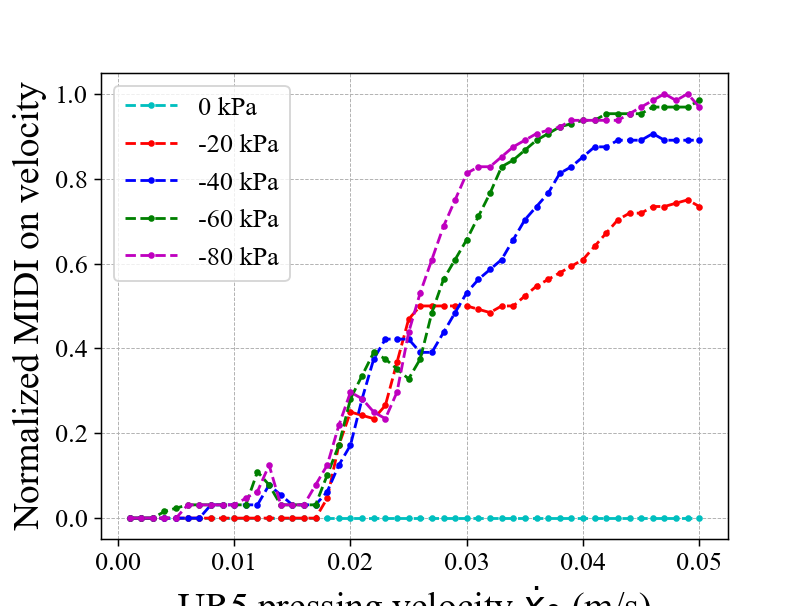

In [14]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 14})

fig = plt.figure(1,figsize=(6, 4.5))
color_list = ['c','r','b','g','m']
vel_list = list(range(1,51))
vel_list[:] = [x / 1000 for x in vel_list]
pressure_list = [0,20,40,60,80]
start = 0
for i in range(len(pressure_list)):
    norm_all_p_midi_list = [x / 64 for x in all_p_midi_list[i]]
    plt.plot(vel_list[start:], norm_all_p_midi_list[start:],label = str(-pressure_list[i])+' kPa',marker = '.', ms = 5, mec=color_list[i],mfc = color_list[i],mew=1,linestyle = 'dashed',color=color_list[i])
    plt.legend(loc='upper left')    

plt.xlabel('UR5 pressing velocity $\dot{x}_0$ (m/s)', fontsize=20)
plt.ylabel('Normalized MIDI on velocity', fontsize=20)
# plt.ylim([9,53])
plt.grid(linestyle = '--', linewidth = 0.5)
# plt.title('Ground truth MIDI on velocity')
plt.savefig("./new figs/real_piano_midi_normalized.jpg",bbox_inches = 'tight')
plt.show()

In [15]:
pressure_list = [0,20,40,60,80]
angle = 45
acc = 0.5
depth = 0.03
start =0

midi_down_list = []
midi_up_list = []
hold_time_list = []
for pressure in pressure_list:
    midi_down = []
    midi_up = []
    hold_time = []
    for press_data in data:
        for d in press_data: 
            if [pressure,angle,acc,depth]==[d['pressure'],d['angle'],d['acc'],d['depth']]:
                midi_down.append(d['midi_down'])
                midi_up.append(d['midi_up'])
                hold_time.append(d['hold_time'])
    midi_down_list.append(midi_down)
    midi_up_list.append(midi_up)
    hold_time_list.append(hold_time)        

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 16})

# fig = plt.figure(1,figsize=(6, 4.5))
# color_list = ['r','b','g','m']
# for i in range(len(pressure_list)):
# #     print(midi_down_list[i])
# #     print(list(np.round(vel_list,3)))
#     plt.plot(list(np.round(vel_list,3))[start:], midi_down_list[i][start:],label = str(-pressure_list[i])+'kPa',marker = 'x', ms = 5, mec=color_list[i],mfc = color_list[i],mew=2,linestyle = 'dashed',color=color_list[i])
#     plt.legend(loc='lower right')    

# plt.xlabel('UR5 pressing velocity $\dot{x}_0$ (m/s)', fontsize=20)
# plt.ylabel('MIDI on velocity (N/m)', fontsize=20)
# plt.ylim([9,53])
# plt.grid(linestyle = '--', linewidth = 0.5)
# plt.title('Ground truth MIDI on velocity')
# plt.savefig("paper_data_analysis/new figs/real_midi.jpg",bbox_inches = 'tight')
# plt.show()
 
fig = plt.figure(2,figsize=(6, 4.5))
color_list = ['r','b','g','m']
for i in range(len(pressure_list)):
#     print(midi_down_list[i])
#     print(list(np.round(vel_list,3)))
    plt.plot(list(np.round(vel_list,3))[start:], hold_time_list[i][start:],label = str(-pressure_list[i])+'kPa',marker = 'x', ms = 5, mec=color_list[i],mfc = color_list[i],mew=2,linestyle = 'dashed',color=color_list[i])
    plt.legend(loc='upper right')    

plt.xlabel('UR5 pressing velocity $\dot{x}_0$ (m/s)', fontsize=20)
plt.ylabel('MIDI hold time (s)', fontsize=20)
plt.ylim([0.4,4.2])
plt.grid(linestyle = '--', linewidth = 0.5)
# plt.title('Ground truth MIDI hold time')
plt.savefig("./new figs/real_piano_midi_ht.jpg",bbox_inches = 'tight')
plt.show()
 

NameError: name 'data' is not defined